# NumMod-2024 Seminar 4 (Spectral methods)

# 1D FFT

Definition of FFT:

$$
y_k = \sum^{N-1}_{n=0}e^{-2\pi i \frac{kn}{N}} x_n
$$


It can be seen that $y_0$ is a constant.

In case the sequence $x$ is real-valued, the values of  for positive frequencies is the conjugate of the values  for negative frequencies (because the spectrum is symmetric). 

Typically, only the FFT corresponding to positive frequencies without constant is plotted.


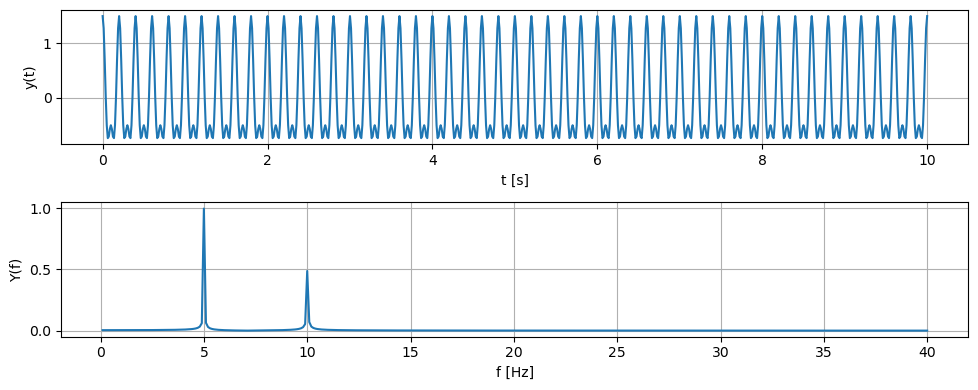

The number of points that are used in FFT are 801


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

# pulse duration - length of observation window
T = 10
# time interval - sampling period
dt = 1/80

# discrete times
x = np.linspace(0.0,T,int(T/dt)+1)
# total number of information instants
N = x.shape[0]



# function to sample
y = np.cos(5 * 2.0*np.pi*x) + 0.5*np.cos(10.0 * 2.0*np.pi*x)


# compute FFT
yf = fft(y)



# sampling frequency
Fs = 1/dt
# frequency intervals 
df = Fs/N
# discrte frequencies
xf = np.linspace(0.0,Fs,N)

plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.plot(x,y)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('y(t)')

plt.subplot(2,1,2)
# keep half of the spectrum and normalize
plt.plot(xf[1:N//2+1], 2.0/N * np.abs(yf[1:N//2+1]))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Y(f)')

plt.tight_layout()
plt.show()
print("The number of points that are used in FFT are",N)

## Filtering

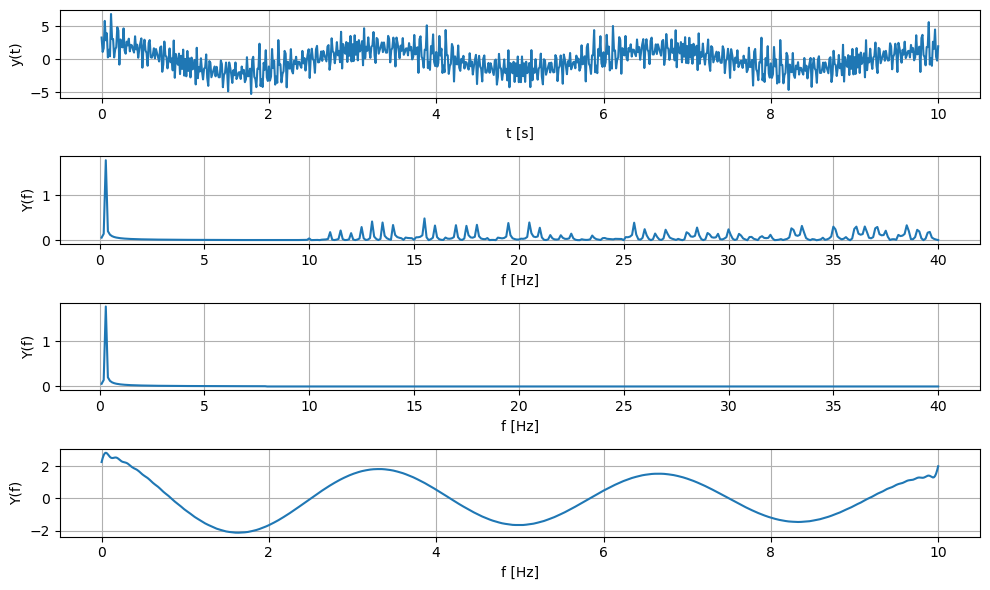

The number of points that are used in FFT are 801


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft

# pulse duration - length of observation window
T = 10
# time interval - sampling period
dt = 1/80

# discrete times
x = np.linspace(0.0,T,int(T/dt)+1)
# total number of information instants
N = x.shape[0]



# function to sample
y_true = np.cos(0.3 * 2.0*np.pi*x) * np.exp(1/(1+x/5))

# add some high-frequent noise
y_noise = np.zeros(N)
for i in np.arange(10, 40, 0.5):
    y_noise += (np.random.sample()-0.5) * np.cos(i * 2.0*np.pi*x)

y = y_true + y_noise
    
# compute FFT
yf = fft(y)

# filtering
yf_filtered = yf.copy()
yf_filtered[N//10 : -N//10] = 0

# restore funtion using inverse FFT
y_filtered = ifft(yf_filtered)



# sampling frequency
Fs = 1/dt
# frequency intervals 
df = Fs/N
# discrte frequencies
xf = np.linspace(0.0,Fs,N)


plt.figure(figsize=(10,6))

plt.subplot(4,1,1)
plt.plot(x,y)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('y(t)')

plt.subplot(4,1,2)
# keep half of the spectrum and normalize
plt.plot(xf[1:N//2+1], 2.0/N * np.abs(yf[1:N//2+1]))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Y(f)')


plt.subplot(4,1,3)
# keep half of the filtered spectrum and normalize
plt.plot(xf[1:N//2+1], 2.0/N * np.abs(yf_filtered[1:N//2+1]))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Y(f)')

plt.subplot(4,1,4)
# filtered function
plt.plot(x, y_filtered)
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Y(f)')

plt.tight_layout()
plt.show()
print("The number of points that are used in FFT are",N)

<br><br>

---

# 2D Discrete Sine Transform

DST- is a Fourier-related transform similar to the discrete Fourier transform (DFT), but using a purely real matrix. It is equivalent to the imaginary parts of a DFT of roughly twice the length, operating on real data with odd symmetry (since the Fourier transform of a real and odd function is imaginary and odd), where in some variants the input and/or output data are shifted by half a sample.

DSTs are widely employed in solving partial differential equations by spectral methods, where the different variants of the DST correspond to slightly different odd/even boundary conditions at the two ends of the array.

Definition of DST:

$$
y_k = 2\sum^{N-1}_{n=0}x_n sin \Big ( \frac{\pi(k+1)(2n+1)}{2N}\Big)
$$

It assumes:
* input is odd around $n=-\frac{1}{2}$ and $n=N-\frac{1}{2}$
* output is odd around $k=-1$ and even around $k=N-1$

In [25]:
# 2D DST
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fftpack import dst, idst
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Generate grid and sample Function

In [26]:
# image size - length of observation window
L_x = 1 # [m]
L_y = 1 # [m]

# space interval - sampling period
dx = 1/80
dy = 1/80

# discrete space
x = np.linspace(0.0,L_x,int(L_x/dx)+1)
y = np.linspace(0.0,L_y,int(L_y/dy)+1)
xv,yv = np.meshgrid(x,y)

# total number of information instants
N_x = x.shape[0]
N_y = y.shape[0]

# change these to see the spectrum-spread at low frequencies
p_x = 2
p_y = 2
Y = np.cos(5.0 * 2.0*np.pi*xv**p_x)*np.cos(10.0 * 2.0*np.pi*yv**p_y) 


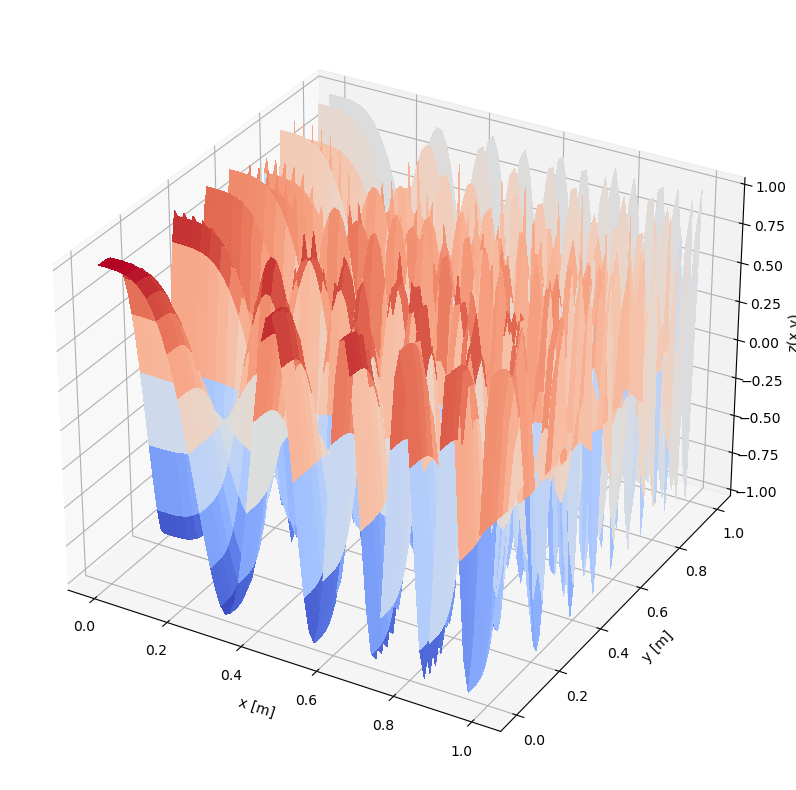

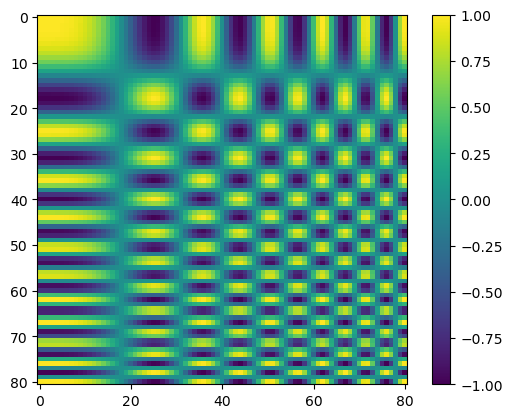

In [27]:
fig = plt.figure(figsize=(10,10))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xv,yv,Y,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z(x,y)')
plt.show()

plt.imshow(Y)
plt.colorbar()
plt.show()

## DST

In [28]:
# this is how to manually compute 2D dst as described in problem set 3 as well:
# Apply dst to each row in the array and then apply dst to each column of the resulting array
Y_dst = dst(dst(Y,axis=1), axis=0)

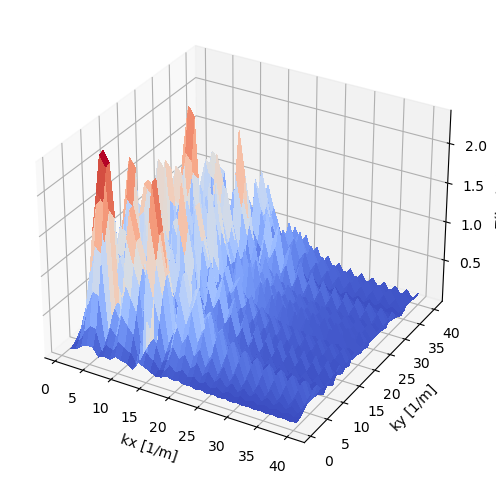

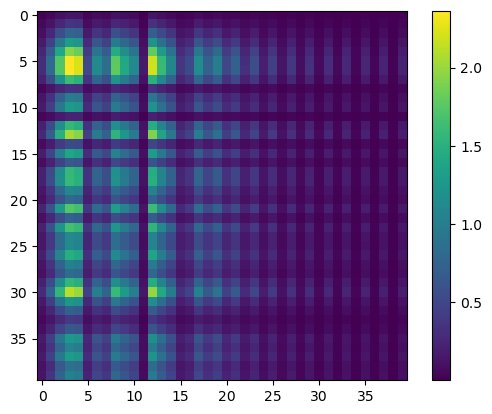

In [30]:
# sampling spatial frequency
Fs_x = 1/dx
Fs_y = 1/dy

# frequency intervals 
df_x = Fs_x/N_x
df_y = Fs_y/N_y

# discrte frequencies
xf = np.linspace(0.0,Fs_x,N_x)
yf = np.linspace(0.0,Fs_y,N_y)
xfv,yfv = np.meshgrid(xf,yf)


# keep half of the spectrum and normalize
norm = 1 / 4 / np.sqrt(N_x * N_y)

fig = plt.figure(figsize=(6,6))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xfv[1:N_y//2+1,1:N_x//2+1],yfv[1:N_y//2+1,1:N_x//2+1], norm * np.abs(Y_dst[1:N_y//2+1,1:N_x//2+1]),cmap=cm.coolwarm,linewidth=0, antialiased=False)
# ax.plot_surface(xfv[1:N_y,1:N_x],yfv[1:N_y,1:N_x], norm * np.abs(Y_dst[1:N_y,1:N_x]),cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('kx [1/m]')
ax.set_ylabel('ky [1/m]')
ax.set_zlabel('Z(kx,ky)')
plt.show()

plt.imshow(norm * np.abs(Y_dst[1:N_y//2+1,1:N_x//2+1]))
plt.colorbar()
plt.show()

 ## inverse DST

In [31]:
norm = 1 / (4 * N_x * N_y)
Y_idst = idst(idst(Y_dst,axis=0), axis=1) * norm

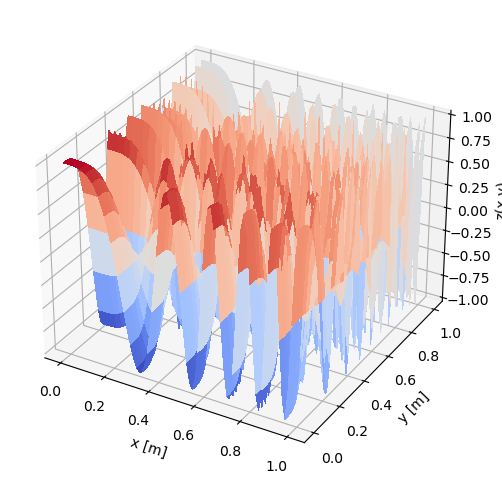

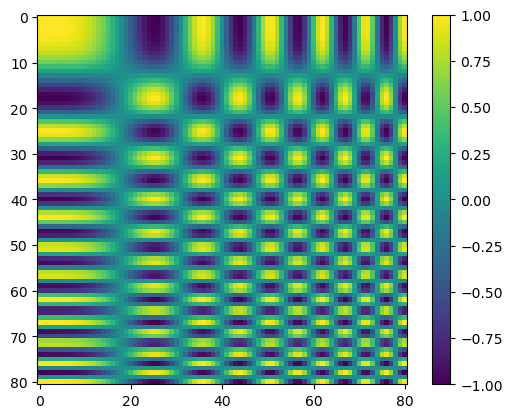

In [33]:
fig = plt.figure(figsize=(6,6))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xv,yv,Y_idst,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z(x,y)')
plt.show()

plt.imshow(Y_idst)
plt.colorbar()
plt.show()

In [34]:
# Errors:
print("MAE(DST-iDST)  =", np.mean(np.abs(Y - Y_idst)))
print("RMSE(DST-iDST) =", np.sqrt(np.mean((Y - Y_idst)**2)))

MAE(DST-iDST)  = 2.1413809123053233e-16
RMSE(DST-iDST) = 2.790384282381448e-16
